Source Code:
https://www.nltk.org/_modules/nltk/sentiment/vader.html

Erklärung NLTK VADER (Valence Aware Dictionary for sEntiment Reasoning):
https://medium.com/@mystery0116/nlp-how-does-nltk-vader-calculate-sentiment-6c32d0f5046b

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0        0.8779
1       -0.0173
2        0.0000
3        0.4767
4        0.0000
          ...  
23370   -0.5423
23371   -0.6369
23372    0.3034
23373    0.0000
23374    0.0000
Name: sentiment, Length: 23375, dtype: float64
year
2015   -0.073248
2016   -0.038707
2017   -0.031741
2018   -0.002225
2019    0.001797
2020    0.005312
2021    0.007775
2022    0.004334
Name: sentiment, dtype: float64


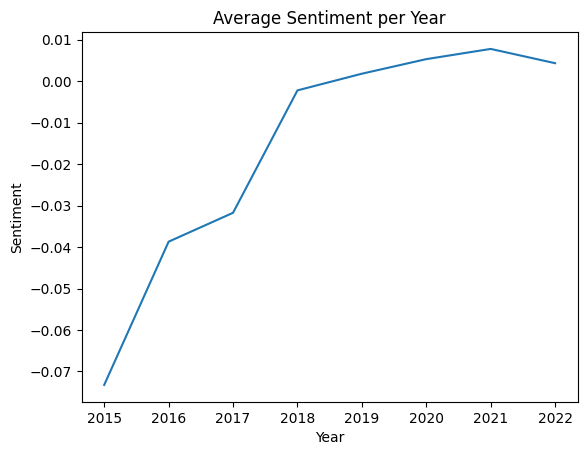

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download


download('vader_lexicon')

file_path = '../all_csv_images/filtered_file_ocr_no_duplicates.csv'  
data = pd.read_csv(file_path)


data['created_utc'] = pd.to_datetime(data['created_utc'], unit='s')  
data['year'] = data['created_utc'].dt.year

sia = SentimentIntensityAnalyzer()
data['sentiment'] = data['ocr_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
print(data['sentiment'])

yearly_sentiment = data.groupby('year')['sentiment'].mean().loc[2015:2022]
print(yearly_sentiment)

plt.plot(yearly_sentiment.index, yearly_sentiment.values)
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.title('Average Sentiment per Year')
plt.xticks(range(2015, 2023))
plt.show()


Beispielsätze für die Sentimentanalyse:

In [12]:

examples = data[['ocr_text', 'sentiment']].sample(10)  

for i, row in examples.iterrows():
    print(f"Example {i}:")
    print(f"OCR Text: {row['ocr_text']}")
    print(f"Sentiment: {row['sentiment']}")
    print("\n")


Example 1780:
OCR Text: When the DJ plays an absolute
banger
316
Sentiment: 0.25


Example 10651:
OCR Text: White power or bad arthritis?
Sentiment: -0.5423


Example 883:
OCR Text: In the name of God, I baptise you,
go forth and spread the word of our
Lord....Amen
Ay bro! what you doing?!
I'm trying to take a shower here
u/meelonhusk
Sentiment: 0.3987


Example 4701:
OCR Text: When you're scared AF of
snakes, but trying to act all
chill and shit
Sentiment: -0.7814


Example 16635:
OCR Text: C'mon man, time to go.
zzzzfive more minizz
No. Get up.
dafuq bro, zibba zabba
where you get off telling
ME I can't sleep on my
OWN PROPERTUHZZZ
Sir, you're on the lawn
in front of a McDonald's.
zzzzjist ten more minizzzzz
Sentiment: -0.3566


Example 607:
OCR Text: Yo I was just thinking...
is a group of squids
called a squad?
Why you always gotta
talk about seafood
when we gettin high?
Faber ve
Sentiment: 0.0


Example 6624:
OCR Text: When the condom accidentally shoots out
imgflip.com
(***
(**)


Hier wird der prozentuale Anteil der postiven, negativen und neutralen Sentimenten ausgerechnet. Man kann erkennen, dass das Lexikon von VADER sehr viele Sätze als enutral erkennt. Das kann daran liegen, dass die Wortwahl auf einem Subreddit nicht zu dem Löexikon passt. Jedoch wurde kein passendes Modell für Reddit auf Huggingface gefunden. Die Sätze die erkannt werden, sind ungefähr gleich positiv und negativ, man könnte darauf schließen, dass das Sentiment trotz des nicht idealen Lexikons eher neutral ist. Jedoch müsste man hier noch genauere Untersuchungen durchführen mit einem passendem Sentiment Lexikon oder einem Sentiment Modell welches auf die Sprache gefinetuned ist.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


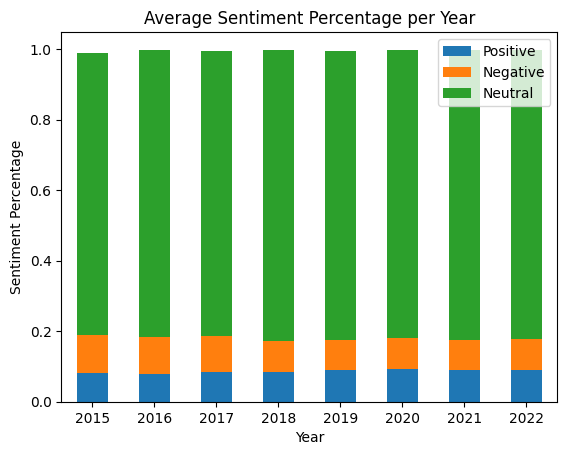

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download


download('vader_lexicon')

file_path = '../all_csv_images/filtered_file_ocr_no_duplicates.csv'  
data = pd.read_csv(file_path)


data['created_utc'] = pd.to_datetime(data['created_utc'], unit='s')  
data['year'] = data['created_utc'].dt.year


sia = SentimentIntensityAnalyzer()
data['sentiment_scores'] = data['ocr_text'].apply(lambda x: sia.polarity_scores(x))

data['positive'] = data['sentiment_scores'].apply(lambda x: x['pos'])
data['negative'] = data['sentiment_scores'].apply(lambda x: x['neg'])
data['neutral'] = data['sentiment_scores'].apply(lambda x: x['neu'])

yearly_sentiment = data.groupby('year')[['positive', 'negative', 'neutral']].mean().loc[2015:2022]

ax = yearly_sentiment.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Sentiment Percentage')
plt.title('Average Sentiment Percentage per Year')
plt.xticks(range(8), range(2015, 2023), rotation=0)
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.show()
